In [8]:
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

#Comment out following if you don't have RiboGraphViz installed
from RiboGraphViz import RGV

#Comment out following if you don't have DegScore installed
from DegScore import DegScore

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv('example.20210618-144823-76459.RUNNING_BEST.txt.RUNNING_BEST.txt',delimiter='\t')

In [18]:
# Quantities recorded by Ribotree during run

print(list(data.keys()))

['sequence', 'CAI', 'AUP', 'AUP_init14', 'MFE Structure', 'dG(MFE)', 'DegScore', 'MLD', 'c5prime', 'c3prime']


In [ ]:
# Visualize pandas dataframe object

data.head()

Text(0.5, 0, 'Iteration')

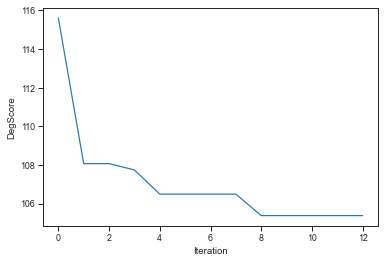

In [20]:
# Monitor decrease in degscore
plot(data.DegScore)
ylabel('DegScore')
xlabel('Iteration')

Text(0, 0.5, 'dG(MFE) (kcal/mol)')

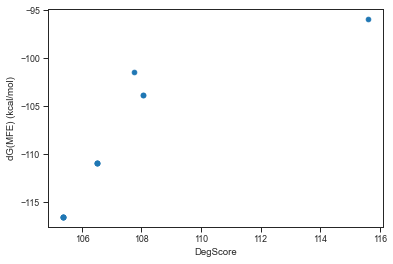

In [21]:
# compare quantities
scatter(data.DegScore, data['dG(MFE)'])
xlabel('DegScore')
ylabel('dG(MFE) (kcal/mol)')

## Visualize final structure for runs not including UTRs (Nanoluciferase) with RiboGraphViz

In [ ]:
sequence = data.iloc[-1]['sequence']
structure = data.iloc[-1]['MFE Structure']
rgv_object = RGV(structure)

# need to re-compute DegScore, as vector of predictions is not saved
mdl = DegScore(sequence, structure)
degscore_vector = mdl.degscore_by_position

figure(figsize=(10,10))
rgv_object.draw(c=degscore_vector)

# To save figure:
#savefig('example_DegScore_run.png',dpi=300, bbox_inches='tight')

## Visualize final structure for runs that did include UTRs (VSV-G) with RiboGraphViz

In [ ]:
sequence = data.iloc[-1]['c5prime']+data.iloc[-1]['sequence']+data.iloc[-1]['c3prime']
structure = data.iloc[-1]['MFE Structure']
rgv_object = RGV(structure)

# need to re-compute DegScore, as vector of predictions is not saved
mdl = DegScore(sequence, structure)
degscore_vector = mdl.degscore_by_position

figure(figsize=(10,10))
rgv_object.draw(c=degscore_vector)

#To save figure
#savefig('example_DegScore_run.png',dpi=300, bbox_inches='tight')